In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from venn import venn

In [2]:
signif_up1 = pd.read_csv("1000signif_up_DEG1.csv")
signif_up2 = pd.read_csv("1000signif_up_DEG2.csv")
signif_up3 = pd.read_csv("1000signif_up_DEG3.csv")
signif_up4 = pd.read_csv("1000signif_up_DEG4.csv")
signif_up1.head()

,gene,log_fold_change,pvals,pvals_adj,-log10_pval
0,PDZRN4,3.407478,0.0,0.0,inf
1,LINC01619,1.357252,0.0,0.0,inf
2,RAD51B,1.407630,0.0,0.0,inf
3,PAM,2.361357,0.0,0.0,inf
4,CDK15,2.135040,0.0,0.0,inf


In [3]:
gene_sets = {
    "EN-IT-L3_V1": set(signif_up1['gene']), 
    "EN-IT-L3/4_V1": set(signif_up2['gene']), 
    "EN-ET-L5/6_V1": set(signif_up3['gene']), 
    "EN-ET-SP-2_V1": set(signif_up4['gene'])
}
gene_sets

{'EN-IT-L3_V1': {'ABI3BP',
  'AC004674.1',
  'AC004832.1',
  'AC007099.2',
  'AC007308.1',
  'AC007422.1',
  'AC007529.1',
  'AC008415.1',
  'AC008691.1',
  'AC008759.3',
  'AC010163.1',
  'AC011593.1',
  'AC013727.2',
  'AC016598.2',
  'AC017053.1',
  'AC021504.1',
  'AC021683.6',
  'AC022182.1',
  'AC022325.2',
  'AC022509.3',
  'AC022509.5',
  'AC025756.1',
  'AC025773.1',
  'AC027319.1',
  'AC067960.1',
  'AC068491.3',
  'AC068535.2',
  'AC069214.1',
  'AC073529.1',
  'AC087477.2',
  'AC090531.1',
  'AC090607.5',
  'AC092168.3',
  'AC092819.1',
  'AC092825.1',
  'AC092958.1',
  'AC093248.1',
  'AC093642.1',
  'AC096763.1',
  'AC097654.1',
  'AC100858.2',
  'AC104370.1',
  'AC104574.2',
  'AC106798.1',
  'AC109466.1',
  'AC110296.1',
  'AC112253.1',
  'AC119677.1',
  'AC126177.3',
  'AC131944.1',
  'AC136424.2',
  'AC211486.2',
  'AC215217.1',
  'AC243960.1',
  'AC245140.1',
  'ADAM28',
  'ADARB2',
  'ADARB2-AS1',
  'ADGRV1',
  'AL033523.1',
  'AL034397.3',
  'AL035420.3',
  'AL0496

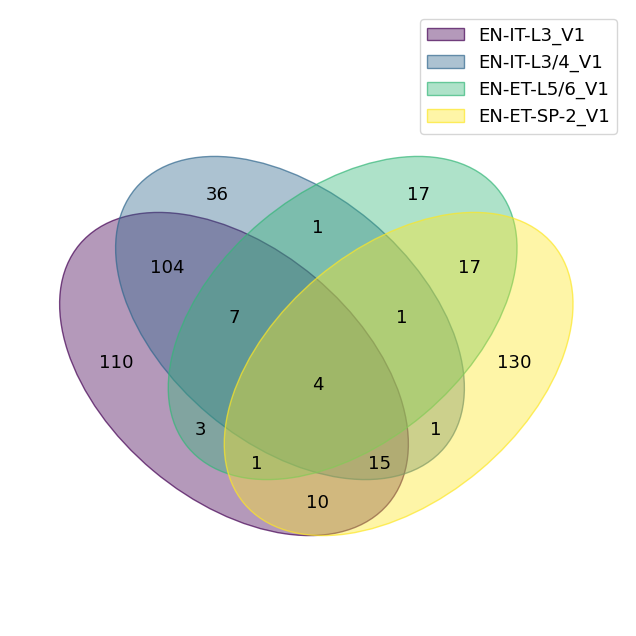

In [5]:
# Plot the Venn diagram
venn(gene_sets)
plt.savefig('1000genes_venn_diagram_V1.pdf')
plt.show()

In [6]:
# Calculating intersections
keys = list(gene_sets.keys())
overlaps = {}
# Calculate intersections for every pair of sets
for i in range(len(keys)):
    for j in range(i + 1, len(keys)):
        key = f"{keys[i]} & {keys[j]}"
        overlaps[key] = gene_sets[keys[i]].intersection(gene_sets[keys[j]])

# Calculate intersections for every trio of sets
for i in range(len(keys)):
    for j in range(i + 1, len(keys)):
        for k in range(j + 1, len(keys)):
            key = f"{keys[i]} & {keys[j]} & {keys[k]}"
            overlaps[key] = gene_sets[keys[i]].intersection(gene_sets[keys[j]], gene_sets[keys[k]])

# Calculate intersection for all four sets
key = " & ".join(keys)
overlaps[key] = set.intersection(*gene_sets.values())

# Convert the dictionary to a DataFrame for better visualization
overlap_df = pd.DataFrame([(k, len(v), "; ".join(v)) for k, v in overlaps.items()], columns=['Intersection', 'Count', 'Genes'])

# Display the DataFrame
print(overlap_df)

                                         Intersection  Count  \
0                         EN-IT-L3_V1 & EN-IT-L3/4_V1    130   
1                         EN-IT-L3_V1 & EN-ET-L5/6_V1     15   
2                         EN-IT-L3_V1 & EN-ET-SP-2_V1     30   
3                       EN-IT-L3/4_V1 & EN-ET-L5/6_V1     13   
4                       EN-IT-L3/4_V1 & EN-ET-SP-2_V1     21   
5                       EN-ET-L5/6_V1 & EN-ET-SP-2_V1     23   
6         EN-IT-L3_V1 & EN-IT-L3/4_V1 & EN-ET-L5/6_V1     11   
7         EN-IT-L3_V1 & EN-IT-L3/4_V1 & EN-ET-SP-2_V1     19   
8         EN-IT-L3_V1 & EN-ET-L5/6_V1 & EN-ET-SP-2_V1      5   
9       EN-IT-L3/4_V1 & EN-ET-L5/6_V1 & EN-ET-SP-2_V1      5   
10  EN-IT-L3_V1 & EN-IT-L3/4_V1 & EN-ET-L5/6_V1 & ...      4   

                                                Genes  
0   LINC01886; NPY; LINC02058; AL138930.1; AC00869...  
1   AC069214.1; TMEM30B; CNTN5; AC092168.3; AC0273...  
2   AC069214.1; PDE3A; AL138930.1; AC243960.1; AL3...  
3   AC0

In [7]:
# Saving the table to a CSV file
overlap_df.to_csv('1000genes_overlaps_V1.csv', index=False)

In [8]:
signif_down1 = pd.read_csv("1000signif_down_DEG1.csv")
signif_down2 = pd.read_csv("1000signif_down_DEG2.csv")
signif_down3 = pd.read_csv("1000signif_down_DEG3.csv")
signif_down4 = pd.read_csv("1000signif_down_DEG4.csv")
signif_down1.head()

,gene,log_fold_change,pvals,pvals_adj,-log10_pval
0,NEUROD6,-18.108143,0.0,0.0,inf
1,ZEB2,-11.903702,0.0,0.0,inf
2,PCDH17,-9.707905,0.0,0.0,inf
3,CBLN2,-6.911612,0.0,0.0,inf
4,FXYD6,-6.602510,0.0,0.0,inf


In [9]:
gene_sets2 = {
    "EN-IT-L3_V1": set(signif_down1['gene']), 
    "EN-IT-L3/4_V1": set(signif_down2['gene']), 
    "EN-ET-L5/6_V1": set(signif_down3['gene']), 
    "EN-ET-SP-2_V1": set(signif_down4['gene'])
}
gene_sets2

{'EN-IT-L3_V1': {'AC002069.2',
  'AC004052.1',
  'AC006064.4',
  'AC006296.3',
  'AC007319.1',
  'AC007364.1',
  'AC007402.1',
  'AC007513.1',
  'AC008056.1',
  'AC008124.1',
  'AC008591.1',
  'AC009269.5',
  'AC009506.1',
  'AC011586.2',
  'AC012409.2',
  'AC013265.1',
  'AC016065.1',
  'AC016687.2',
  'AC017048.2',
  'AC020637.1',
  'AC020651.2',
  'AC021351.1',
  'AC021678.2',
  'AC055758.2',
  'AC068051.1',
  'AC068282.2',
  'AC068308.1',
  'AC068787.5',
  'AC073270.1',
  'AC079906.1',
  'AC080068.1',
  'AC080132.1',
  'AC087516.1',
  'AC090109.1',
  'AC090692.1',
  'AC091078.1',
  'AC091965.4',
  'AC092435.2',
  'AC092691.1',
  'AC092957.1',
  'AC092994.1',
  'AC093151.3',
  'AC093249.6',
  'AC096570.1',
  'AC096577.1',
  'AC096747.1',
  'AC097528.1',
  'AC099511.1',
  'AC099792.1',
  'AC103409.1',
  'AC104803.1',
  'AC105230.1',
  'AC105411.1',
  'AC108721.1',
  'AC110023.1',
  'AC114689.3',
  'AC116903.1',
  'AC117461.1',
  'AC117464.1',
  'AC125613.1',
  'AC131097.2',
  'AC1397

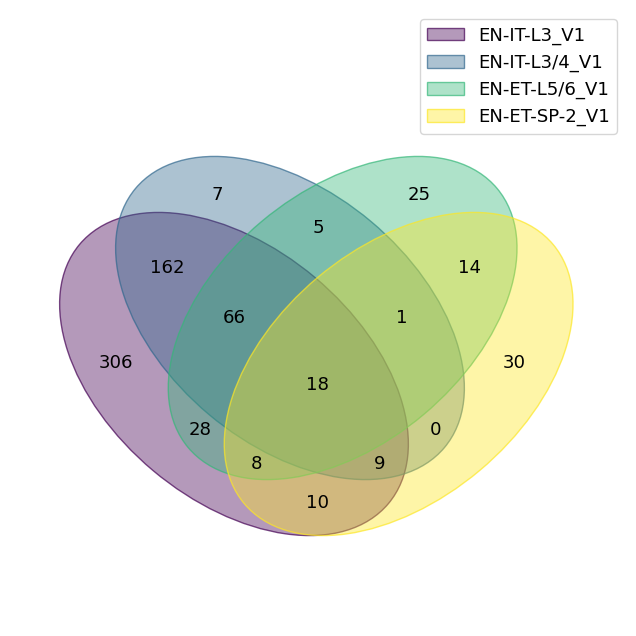

In [10]:
# Plot the Venn diagram
venn(gene_sets2)
plt.savefig('1000genes_venn_diagram_V2.pdf')
plt.show()

In [12]:
# Calculating intersections
keys2 = list(gene_sets2.keys())
overlaps2 = {}
# Calculate intersections for every pair of sets
for i in range(len(keys2)):
    for j in range(i + 1, len(keys2)):
        key2 = f"{keys2[i]} & {keys2[j]}"
        overlaps2[key2] = gene_sets2[keys2[i]].intersection(gene_sets2[keys2[j]])

# Calculate intersections for every trio of sets
for i in range(len(keys2)):
    for j in range(i + 1, len(keys2)):
        for k in range(j + 1, len(keys2)):
            key2 = f"{keys2[i]} & {keys2[j]} & {keys2[k]}"
            overlaps2[key2] = gene_sets2[keys2[i]].intersection(gene_sets2[keys2[j]], gene_sets2[keys2[k]])

# Calculate intersection for all four sets
key2 = " & ".join(keys2)
overlaps2[key2] = set.intersection(*gene_sets2.values())

# Convert the dictionary to a DataFrame for better visualization
overlap_df2 = pd.DataFrame([(k, len(v), "; ".join(v)) for k, v in overlaps2.items()], columns=['Intersection', 'Count', 'Genes'])

# Display the DataFrame
print(overlap_df2)

                                         Intersection  Count  \
0                         EN-IT-L3_V1 & EN-IT-L3/4_V1    255   
1                         EN-IT-L3_V1 & EN-ET-L5/6_V1    120   
2                         EN-IT-L3_V1 & EN-ET-SP-2_V1     45   
3                       EN-IT-L3/4_V1 & EN-ET-L5/6_V1     90   
4                       EN-IT-L3/4_V1 & EN-ET-SP-2_V1     28   
5                       EN-ET-L5/6_V1 & EN-ET-SP-2_V1     41   
6         EN-IT-L3_V1 & EN-IT-L3/4_V1 & EN-ET-L5/6_V1     84   
7         EN-IT-L3_V1 & EN-IT-L3/4_V1 & EN-ET-SP-2_V1     27   
8         EN-IT-L3_V1 & EN-ET-L5/6_V1 & EN-ET-SP-2_V1     26   
9       EN-IT-L3/4_V1 & EN-ET-L5/6_V1 & EN-ET-SP-2_V1     19   
10  EN-IT-L3_V1 & EN-IT-L3/4_V1 & EN-ET-L5/6_V1 & ...     18   

                                                Genes  
0   NEUROG2; HES5; GAD2; AC117464.1; NWD2; COL3A1;...  
1   NEUROG2; AC117464.1; NWD2; COL3A1; CCBE1; PCCA...  
2   AL353600.2; FOXS1; TRPM3; ADAMTSL3; LHX6; FCN1...  
3   NEU

In [25]:
# Saving the table to a CSV file
overlap_df2.to_csv('1000genes_overlaps_V2.csv', index=False)